# <b>  Linear Regression

In [10]:
# These are the libraries will be used for this lab.
from resources.utils.headers import *
%matplotlib inline  

### <b>  Functions

In [35]:
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start
        
    # Executor 
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
        
      
    # Destructor
    def __del__(self):
        plt.close('all')  
        

In [48]:
def forward(x):
    return w * x

Mean Square Error

In [49]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

#### <b> Using PyTorch to make Predictions

In [11]:
w = torch.tensor(2.0, requires_grad = True) #weights 
b = torch.tensor(-1.0, requires_grad = True) #bias

In [12]:
# function for prediction
def forward(x):
    yhat = w * x + b
    return yhat

#### Predictions one input

In [13]:
x = torch.tensor([[1.0]])
yhat = forward(x)

In [14]:
print('X = ', x)
print('Prediction = ', yhat)

X =  tensor([[1.]])
Prediction =  tensor([[1.]], grad_fn=<AddBackward0>)


#### Predictions two inputs

In [15]:
x = torch.tensor([[1.0], [2.0]])
yhat = forward(x)
print('Shape of x = ', x)
print('Prediction = ', yhat)

Shape of x =  tensor([[1.],
        [2.]])
Prediction =  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


#### Predictions three inputs

In [16]:
x = torch.tensor([[1.0], [2.0], [3.0]])
yhat = forward(x)
print('Shape of x = ', x)
print('Prediction = ', yhat)

Shape of x =  tensor([[1.],
        [2.],
        [3.]])
Prediction =  tensor([[1.],
        [3.],
        [5.]], grad_fn=<AddBackward0>)


#### <b> Using Linear Class to make Predictions

In [17]:
torch.manual_seed(1)

In [18]:
# Create Linear Regression Model, and print out the parameters
lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))

Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [19]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


In [20]:
print("weight:",lr.weight)
print("bias:",lr.bias)

weight: Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias: Parameter containing:
tensor([-0.4414], requires_grad=True)


#### Predictions one input

In [21]:
x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward>)


#### Predictions two input

In [22]:
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


#### Predictions three input

In [23]:
x = torch.tensor([[1.0],[2.0],[3.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


#### <b> Using Custom Modules to make Predictions
    

In [24]:
# Linear Regression Class
class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
     # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [25]:
# Create the linear regression model. Print out the parameters.
lr = LR(1, 1)
print('Parameters = ', list(lr.parameters()))

Parameters =  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [26]:
print('Linear model = ', lr.linear)

Linear model =  Linear(in_features=1, out_features=1, bias=True)


#### Predictions one input

In [27]:
x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755]], grad_fn=<AddmmBackward>)


#### Predictions two input

In [28]:
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward>)


#### Predictions three input

In [29]:
x = torch.tensor([[1.0],[2.0],[3.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward>)


### <b> Creating Model and Cost Function

In [45]:
X = torch.arange(-2, 2, 0.1).view(-1, 1)
f = -3 * X
Y = f + 0.1 * torch.randn(X.size())

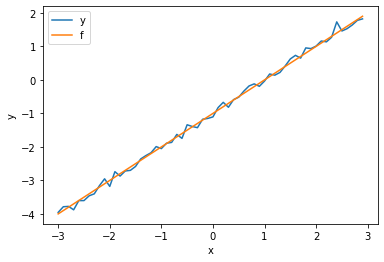

In [65]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### <b> Creating Model and Cost Function

### <b> Train the Model

In [68]:
# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [69]:
# Define learning rate and create an empty list for containing the loss for each iteration.
lr = 0.1
LOSS = []

In [70]:
# The function for training the model
def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

In [71]:
# Train the model with 15 iterations

train_model(15)

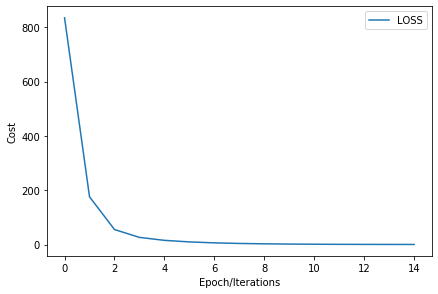

In [72]:
# Practice: Plot the LOSS and LOSS2 in order to compare the Total Loss
plt.plot(LOSS, label = "LOSS")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()